# 06 머신러닝 Mashine Learning

### 01) 머신러닝이란?

1. 머신러닝이 아닌 접근 방법의 한계

  ex.고양이와 강아지 구분

2. 머신러닝 방식

  데이터가 주어지면 기계가 스스로 규칙성을 찾는 훈련 또는 학습을 통해 해결책을 찾는다.

### 02) 머신러닝 훑어보기

1. 머신러닝 모델의 평가

  머신러닝 데이터 분리 : 훈련용, 검증용, 테스트용
  
  - 검증용 : 모델의 성능 조정(튜닝 tuning)을 위한 용도 
  
    과적합 overfitting 판단 or 하이퍼파라미터 (모델 성능에 영향을 주는 사람이 값을 지정하는 변수) 조정

2. 분류 Classification 와 회귀 Regression

- 이진 분류 문제 Binary Classification

- 다중 클래스 분류 Multi-class Classification

- 회귀 문제 Regression : 연속된 값을 결과로 가진다.

3. 지도 학습과 비지도 학습

- 지도 학습 : 레이블 존재

- 비지도 학습 : 레이블 없이 학습

- 자기지도 학습 Self-Supervised Learning, SSL : 레이블이 없는 데이터가 주어지면, 모델이 학습을 위해서 스스로 데이터로부터 레이블을 만들어서 학습

4. 샘플 Sample 과 특성 Feature

  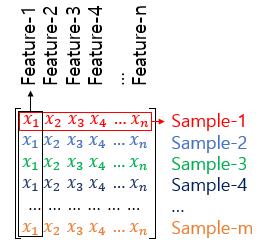

5. 혼동 행렬 Confusion Matrix

  - 정확도 : 맞춘 문제 수 / 전체 문제 수

  - 혼돈 행렬 : 정확도가 세부적인 내용을 알려 주지 않기 때문에 사용

  True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답)

  False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답)

  False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답)

  True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답)

6. 과적합 Overfitting 과 과소적합 Underfitting

  훈련을 과하게 한 경우 vs 훈련을 덜 한 경우

  과적합을 막을 수 있는 방법으로 드롭아웃, 조기 종료 등이 있다. 

### 03) 선형 회귀 Linear Regression

1. 선형 회귀

- 단순 선형 회귀 분석 Simple Linear Regression Analysis

  y = w(가중치 weight)x + b(편향 bias)

- 다중 선형 회귀 분석 Multiple Linear Regression Analysis

  y = WX + b

2. 가설 세우기

  H(x) = wx + b

3. 비용 함수 Cost Function : 평균 제곱 오차 MSE

  실제값과 예측값에 대한 오차에 대한 식 최소화
  
  회귀 문제에는 주로 **평균 제곱 오차** 사용

4. 옵티마이저 Optimizer : 경사하강법 Gradient Descent

  - 옵티마이저 or 최적화 알고리즘 : 비용 함수 최소화하는 매개 변수인 w와 b 찾기 위해 사용되는 알고리즘

  - 경사하강법

  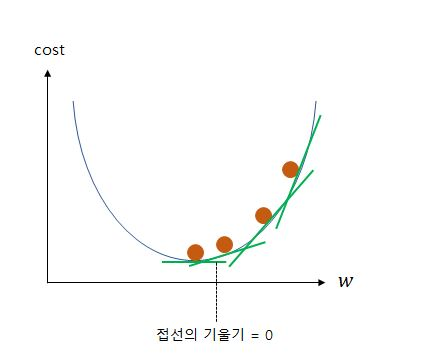

  (학습률이 너무 크다면 접선의 기울기가 0이 되는 w를 찾아가는 것이 아닌 w의 값이 발산한다. 반대로 학습률이 지나치게 낮은 값을 가지면 학습 속도가 느려지므로 적당한 값을 찾아내는 것이 중요하다.)

### 4) 자동 미분과 선형 회귀 실습

1. 자동 미분

In [ ]:
import tensorflow as tf

w = tf.Variable(2.) # x

def f(w): # 식
  y = w**2
  z = 2*y + 5
  return z

with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w]) # 자동 미분 실행
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


2. 자동 미분을 이용한 선형 회귀 구현

In [5]:
w = tf.Variable(4.0)
b = tf.Variable(1.0)

@tf.function
def hypothesis(x): # 가설을 함수로 정의
  return w*x + b

@tf.function
def mse_loss(y_pred, y): # 평균 제곱 오차를 손실 함수로 정의
  return tf.reduce_mean(tf.square(y_pred - y))

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 성적

optimizer = tf.optimizers.SGD(0.01) # 학습률 0.01

for i in range(301):
  with tf.GradientTape() as tape:
    # 현재 파라미터에 기반한 입력 x에 대한 예측값
    y_pred = hypothesis(x)

    # 평균 제곱 오차
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradients = tape.gradient(cost, [w, b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w, b]))

  if i % 100 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 200 | w의 값 : 10.5982 | b의 값 : 1.341 | cost : 1.120843
epoch : 300 | w의 값 : 10.6269 | b의 값 : 1.161 | cost : 1.086645


In [6]:
x_test = [3.5, 5, 5.5, 6] # 예측값
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


3. 케라스로 구현하는 선형 회귀

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/300
1/1 [==============================] - 0s 393ms/step - loss: 3240.5535 - mse: 3240.5535
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 399.7615 - mse: 399.7615
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 50.2225 - mse: 50.2225
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 7.2136 - mse: 7.2136
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 1.9208 - mse: 1.9208
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 1.2687 - mse: 1.2687
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 1.1876 - mse: 1.1876
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1768 - mse: 1.1768
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1746 - mse: 1.1746
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1735 - mse: 1.1735
Epoch 11/300
1/1 [==============================] - 0s 5ms/step 

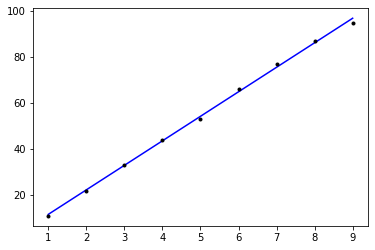

In [8]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [9]:
print(model.predict([9.5]))

[[102.18416]]


### 5) 로지스틱 회귀 Logistic Regression

1. 이진 분류

  합격과 불합격을 그래프로 표현하면 다음과 같다. 

  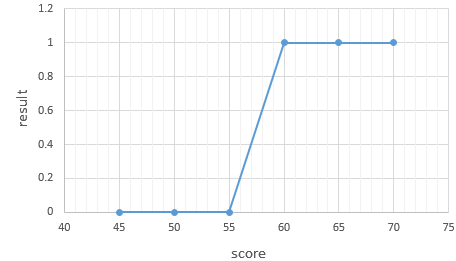

  따라서 직선을 사용할 경우 제대로 분류할 수 없다. 

2. 시그모이드 함수 Sigmoid function : 입력값이 커지면 1에 수렴, 작아지면 0에 수렴


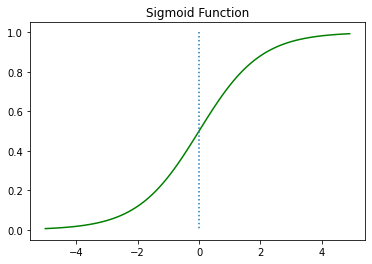

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

3. 비용 함수

  로지스틱 회귀에서 평균제곱 오차를 사용하면 로컬 미니멈에 빠질 가능성이 높다. 따라서 **크로스 엔트로스 Cross Entropy 함수**를 사용한다. 

  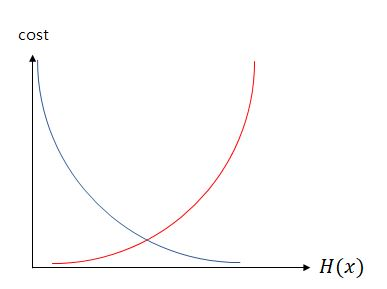

### 06) 로지스틱 회귀 실습

1. 케라스로 구현하는 로지스틱 회귀



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01) # 경사하강법
# 크로스 엔트로피 함수 : binary_crossentropy
# 이진 분류에서 정확도 : binary_accuracy
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
1/1 [==============================] - 0s 388ms/step - loss: 25.3525 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 7ms/step - loss: 19.8503 - binary_accuracy: 0.1538
Epoch 3/200
1/1 [==============================] - 0s 7ms/step - loss: 14.3536 - binary_accuracy: 0.1538
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 8.8762 - binary_accuracy: 0.1538
Epoch 5/200
1/1 [==============================] - 0s 9ms/step - loss: 3.4853 - binary_accuracy: 0.1538
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2626 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2432 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2328 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 0.2261 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 7ms/

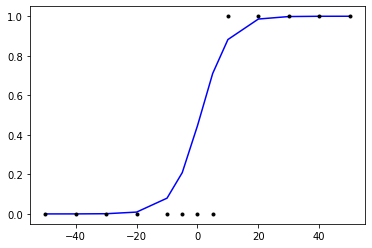

In [12]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

In [13]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[[0.50159305]
 [0.55708086]
 [0.6111798 ]
 [0.66267216]
 [0.68712246]]
[[0.9034258 ]
 [0.9886306 ]
 [0.9987643 ]
 [0.99986696]
 [1.        ]]


### 07) 다중 입력에 대한 실습

1. 다중 선형 회귀



In [14]:
# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/2000
1/1 [==============================] - 0s 271ms/step - loss: 8978.9277 - mse: 8978.9277
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 5016.0996 - mse: 5016.0996
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 2835.2261 - mse: 2835.2261
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 1624.4255 - mse: 1624.4255
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 945.4351 - mse: 945.4351
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 560.3877 - mse: 560.3877
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 339.3431 - mse: 339.3431
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 210.7759 - mse: 210.7759
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 134.9674 - mse: 134.9674
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 89.6392 - mse: 89.6392
Epoch 11/2000
1/1 [==

In [15]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

[[57.91285 ]
 [56.056175]]


2. 다중 로지스틱 회귀

In [16]:
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 328ms/step - loss: 0.9865 - binary_accuracy: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 0.9849 - binary_accuracy: 0.3333
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 0.9832 - binary_accuracy: 0.3333
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 0.9816 - binary_accuracy: 0.3333
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 0.9800 - binary_accuracy: 0.3333
Epoch 6/200
1/1 [==============================] - 0s 8ms/step - loss: 0.9784 - binary_accuracy: 0.3333
Epoch 7/200
1/1 [==============================] - 0s 8ms/step - loss: 0.9768 - binary_accuracy: 0.3333
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 0.9752 - binary_accuracy: 0.3333
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 0.9736 - binary_accuracy: 0.3333
Epoch 10/200
1/1 [==============================] - 0s 4ms/ste

In [17]:
print(model.predict(X))

[[0.51539356]
 [0.6638608 ]
 [0.37237635]
 [0.78575087]
 [0.52421045]
 [0.24867994]]


### 8) 벡터와 행렬 연산

1. 벡터와 행렬과 텐서

  1차원; 2차원; 3차원 이상 배열

2. 텐서 Tensor

- 0차원 텐서 (스칼라)

- 1차원 텐서 (벡터)

- 2차원 텐서 (행렬)

- 3차원 텐서 (다차원 배열)

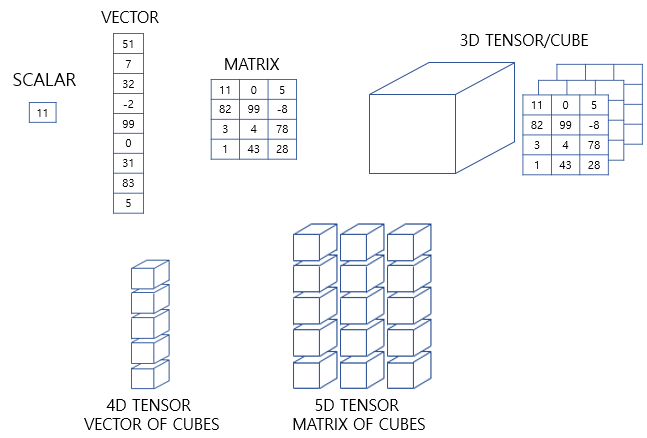

3. 벡터와 행렬의 연산

- 벡터와 행렬의 덧셈과 뺄셈

In [18]:
A = np.array([[10, 20, 30, 40], [50, 60, 70, 80]])
B = np.array([[5, 6, 7, 8],[1, 2, 3, 4]])
print('두 행렬의 합 :')
print(A + B)
print('두 행렬의 차 :')
print(A - B)

두 행렬의 합 :
[[15 26 37 48]
 [51 62 73 84]]
두 행렬의 차 :
[[ 5 14 23 32]
 [49 58 67 76]]


- 벡터의 내적
  
  a dot b

  두 벡터의 차원이 같아야 하며, 두 벡터 중 앞의 벡터가 행벡터이고 뒤 벡터가 열백터여야 한다. 결과는 항상 스칼라이다.

In [19]:
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])
print('두 벡터의 내적 :',np.dot(A, B))

두 벡터의 내적 : 32


- 행렬의 곱셈

  1. 두 행렬의 곱 A × B이 성립되기 위해서는 행렬 A의 열의 개수와 행렬 B의 행의 개수는 같아야 한다.

  2. 두 행렬의 곱 A × B의 결과로 나온 행렬 AB의 크기는 A의 행의 개수와 B의 열의 개수를 가진다.

In [20]:
A = np.array([[1, 3],[2, 4]])
B = np.array([[5, 7],[6, 8]])
print('두 행렬의 행렬곱 :')
print(np.matmul(A, B))

두 행렬의 행렬곱 :
[[23 31]
 [34 46]]


### 09) 소프트맥스 회귀 Softmax Regression

3개 이상의 선택지 중 1개 고르는 다중 클래스 분류 문제

1. 소프트맥스 함수 : 선택지가 k개 라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정

  분류하고자 하는 클래스가 k개일 때, k차원의 벡터를 입력받아서 모든 벡터 원소의 값을 0과 1사이의 값으로 값을 변경하여 다시 k차원의 벡터를 반환

  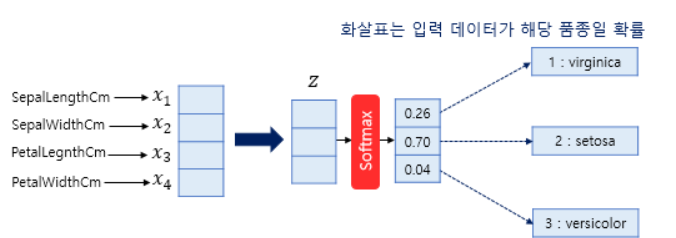

- 4차원 데이터를 소프트맥스의 입력인 3차원 데이터로 변형 : 차원 축소

- 오차 계산법

  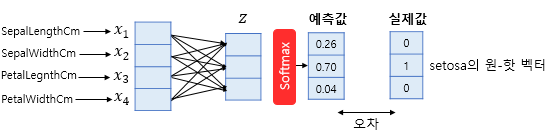

2. 비용 함수

- 소프트맥스에서 크로스 엔트로피 함수

  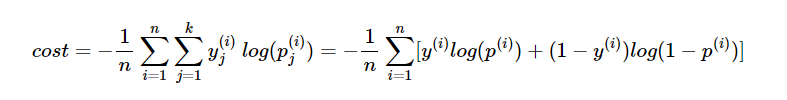

### 10) 소프트맥스 회귀 실습 : 캐글 붓꽃 품종 분류 문제 데이터

https://www.kaggle.com/saurabh00007/iriscsv

1. 아이리스 품종 데이터에 대한 이해

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from google.colab import files

myfile = files.upload()

Saving Iris.csv to Iris.csv


품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


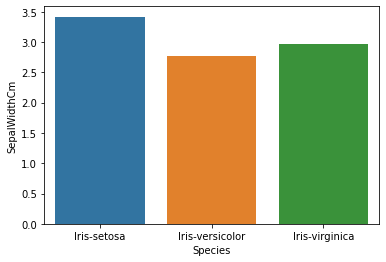

In [22]:
data = pd.read_csv('Iris.csv', encoding='latin1')

# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("품종 종류:", data["Species"].unique(), sep="\n")

# 각 종과 특성에 대한 연관 관계
sns.barplot(data['Species'], data['SepalWidthCm'], ci=None)

In [24]:
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])

# X 데이터. 특성은 총 4개.
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

# 훈련 데이터와 테스트 데이터를 8:2로 나눈다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

2. 소프트맥스 회귀

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))

Epoch 1/200
120/120 [==============================] - 1s 3ms/step - loss: 4.4237 - accuracy: 0.3250 - val_loss: 3.5335 - val_accuracy: 0.3667
Epoch 2/200
120/120 [==============================] - 0s 2ms/step - loss: 2.8512 - accuracy: 0.3000 - val_loss: 2.4163 - val_accuracy: 0.0667
Epoch 3/200
120/120 [==============================] - 0s 2ms/step - loss: 1.8915 - accuracy: 0.0917 - val_loss: 1.9478 - val_accuracy: 0.0000e+00
Epoch 4/200
120/120 [==============================] - 0s 2ms/step - loss: 1.5408 - accuracy: 0.1917 - val_loss: 1.7715 - val_accuracy: 0.1333
Epoch 5/200
120/120 [==============================] - 0s 2ms/step - loss: 1.4098 - accuracy: 0.2833 - val_loss: 1.6580 - val_accuracy: 0.2000
Epoch 6/200
120/120 [==============================] - 0s 2ms/step - loss: 1.3289 - accuracy: 0.3583 - val_loss: 1.5699 - val_accuracy: 0.2000
Epoch 7/200
120/120 [==============================] - 0s 2ms/step - loss: 1.2700 - accuracy: 0.3417 - val_loss: 1.4910 - val_accuracy: 0.

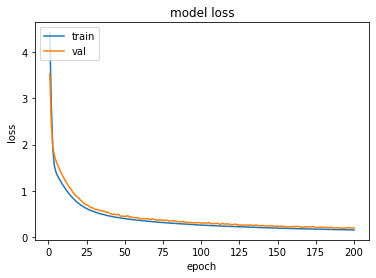

In [26]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
print("테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 134ms/step - loss: 0.2045 - accuracy: 0.9667
테스트 정확도: 0.9667
